In [52]:
#Actividad 3 - Métodos de aprendizaje supervisado
#Actividad 4 - Métodos de aprendizaje no supervisado
#Estudiantes
#Krhistian Alejandro Gonzalez Duarte
#Wilson Merardo Cañon

#Importando Librerias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans

from sklearn.datasets import load_iris

In [53]:
#Importando Bd
url = 'https://raw.githubusercontent.com/1Alejo31/Inteligencia-artificial-Unidad-3/master/diabetes.csv'
#Procesando la bd
df = pd.read_csv(url, delimiter=',', encoding='utf-8')
#Mostrando los primeros 5 registros
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
#Contar si hay valores nulos 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
#Sacando el resumen estadistico
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
#Buscando los valores mas bajos de glucosa
df["Glucose"].nsmallest(15)

75      0
182     0
342     0
349     0
502     0
62     44
680    56
146    57
537    57
352    61
76     62
737    65
596    67
520    68
617    68
Name: Glucose, dtype: int64

#Buscando

In [57]:
#Buscando los valores mas bajos de SkinThickness
df["SkinThickness"].nsmallest(15)

2     0
5     0
7     0
9     0
10    0
11    0
12    0
15    0
17    0
21    0
22    0
26    0
29    0
33    0
36    0
Name: SkinThickness, dtype: int64

In [58]:
#Reemplazando los valores 0 por NaN
df["Glucose"]=df["Glucose"].replace(0,np.nan)
df["BloodPressure"]=df["BloodPressure"].replace(0,np.nan)
df["SkinThickness"]=df["SkinThickness"].replace(0,np.nan)
df["SkinThickness"]=df["SkinThickness"].replace(0,np.nan)
df["BMI"]=df["BMI"].replace(0,np.nan)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112,26.2,0.245,30,0
766,1,126.0,60.0,NaN,0,30.1,0.349,47,1


In [59]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [60]:
#Sacando la media de cada columna
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                      30.5000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [61]:
#Rellenar los valores nulos (NaN), con las medianas de cada columna respectiva
df.fillna(df.median(), inplace=True)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112,26.2,0.245,30,0
766,1,126.0,60.0,29.0,0,30.1,0.349,47,1


In [62]:
#Se realiza nuevo reconteo para validar que este correcta la informacion sin nulos
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [63]:
#Se realiza la importacion seaborn para utilizar las graficas
import seaborn as sb

C:\Users\alejo\AppData\Local\Temp\ipykernel_14248\3117634339.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,5)


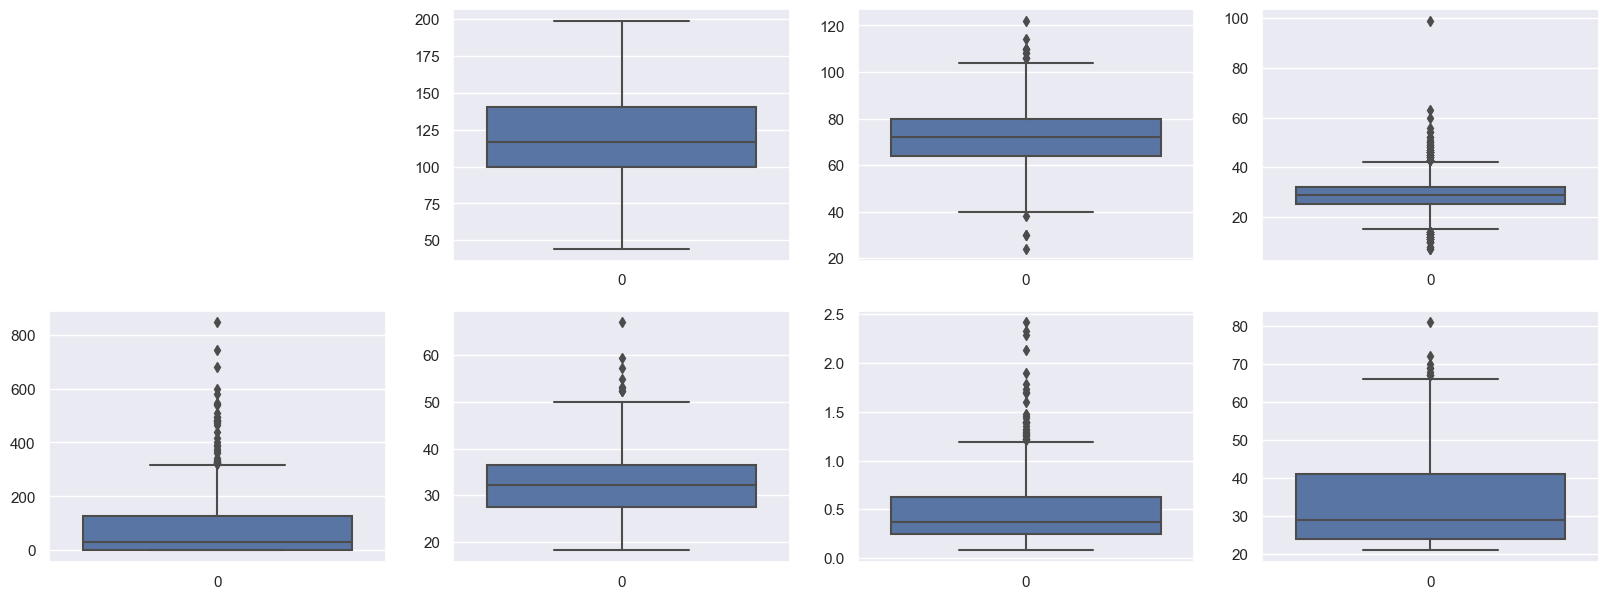

In [64]:
#Imprimiendo las graficas de cada una de las columnas con graficos tipo bigote

plt.figure(figsize=(20,15))

plt.subplot(3,5,1)
sb.boxplot(df["Pregnancies"])

plt.subplot(4,4,2)
sb.boxplot(df["Glucose"])

plt.subplot(4,4,3)
sb.boxplot(df["BloodPressure"])

plt.subplot(4,4,4)
sb.boxplot(df["SkinThickness"])


plt.subplot(4,4,5)
sb.boxplot(df["Insulin"])

plt.subplot(4,4,6)
sb.boxplot(df["BMI"])

plt.subplot(4,4,7)
sb.boxplot(df["DiabetesPedigreeFunction"])

plt.subplot(4,4,8)
sb.boxplot(df["Age"])

plt.show()

In [65]:
# se recortarán o limitarán para asegurarse de que estén dentro del rango entre el percentil
df["BloodPressure"]=df["BloodPressure"].clip(lower=df["BloodPressure"].quantile(0.07),upper=df["BloodPressure"].quantile(0.93))
df["Glucose"]=df["Glucose"].clip(lower=df["Glucose"].quantile(0.21),upper=df["Glucose"].quantile(0.80))
df["Insulin"]=df["Insulin"].clip(lower=df["Insulin"].quantile(0.25),upper=df["Insulin"].quantile(0.75))

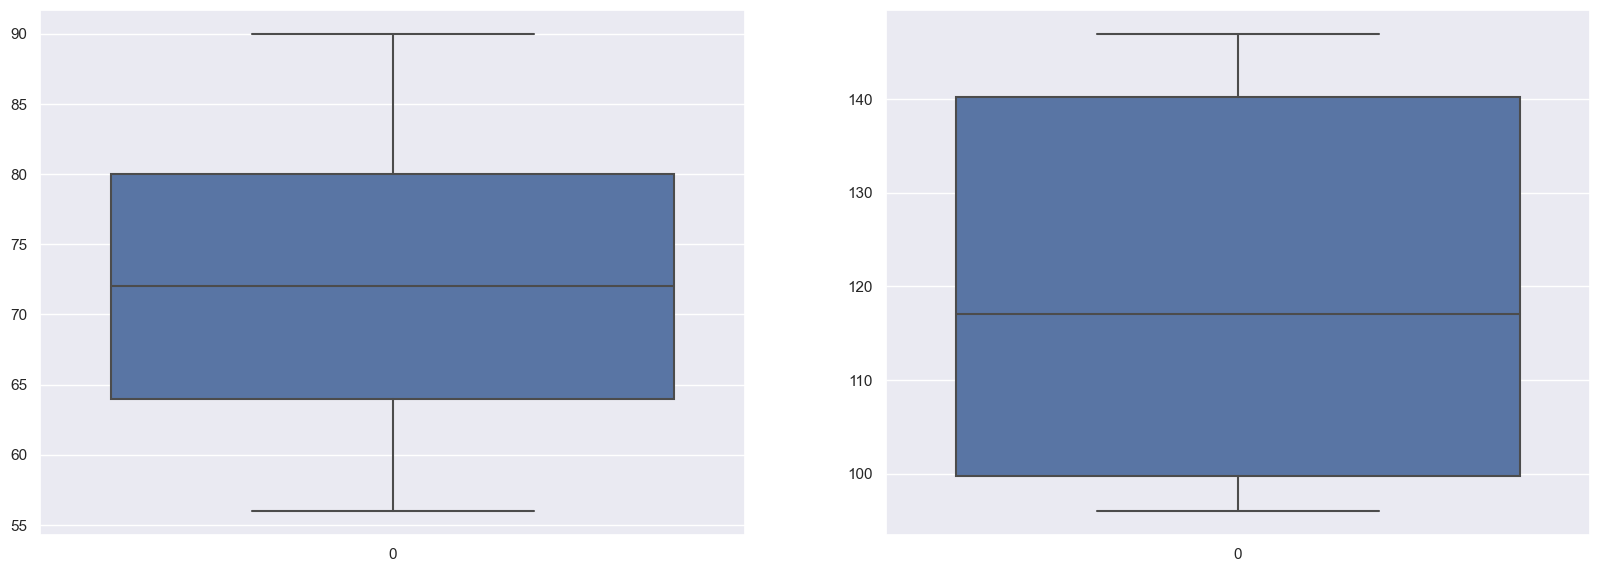

In [66]:
#Imprimiendo las graficas con valores recortados
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sb.boxplot(df["BloodPressure"])

plt.subplot(2,2,2)
sb.boxplot(df["Glucose"])

plt.show()

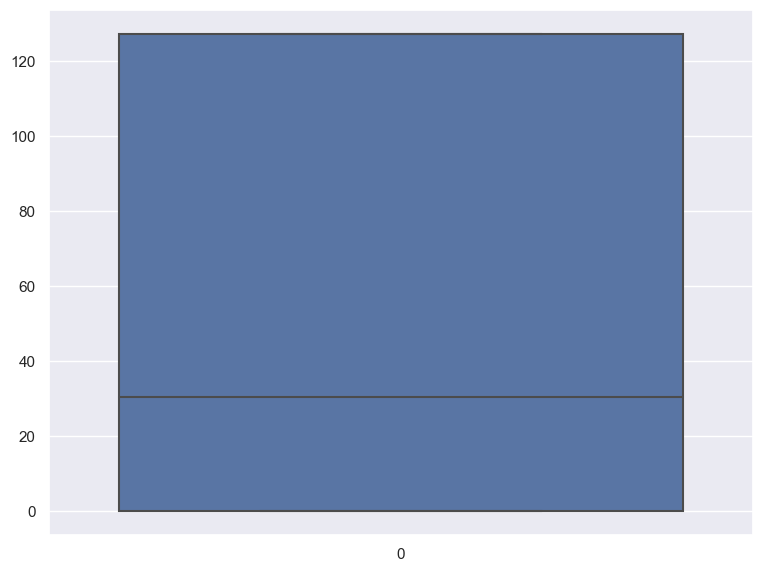

In [67]:
#Imprimiendo grafica de "Insulin"
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sb.boxplot(df["Insulin"])

plt.show()


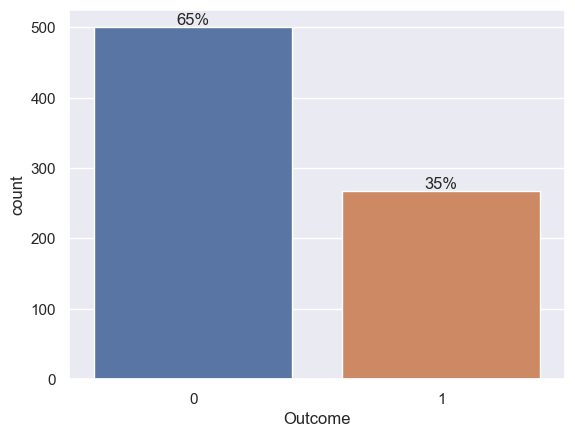

In [68]:
#Mostrando la distribuvion de la variable
total=float(len(df))
ax=sb.countplot(x="Outcome",data=df)
for i in ax.patches:
    height=i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 3
        ,'{0:.0%}'.format(height/total),ha="center")

C:\Users\alejo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


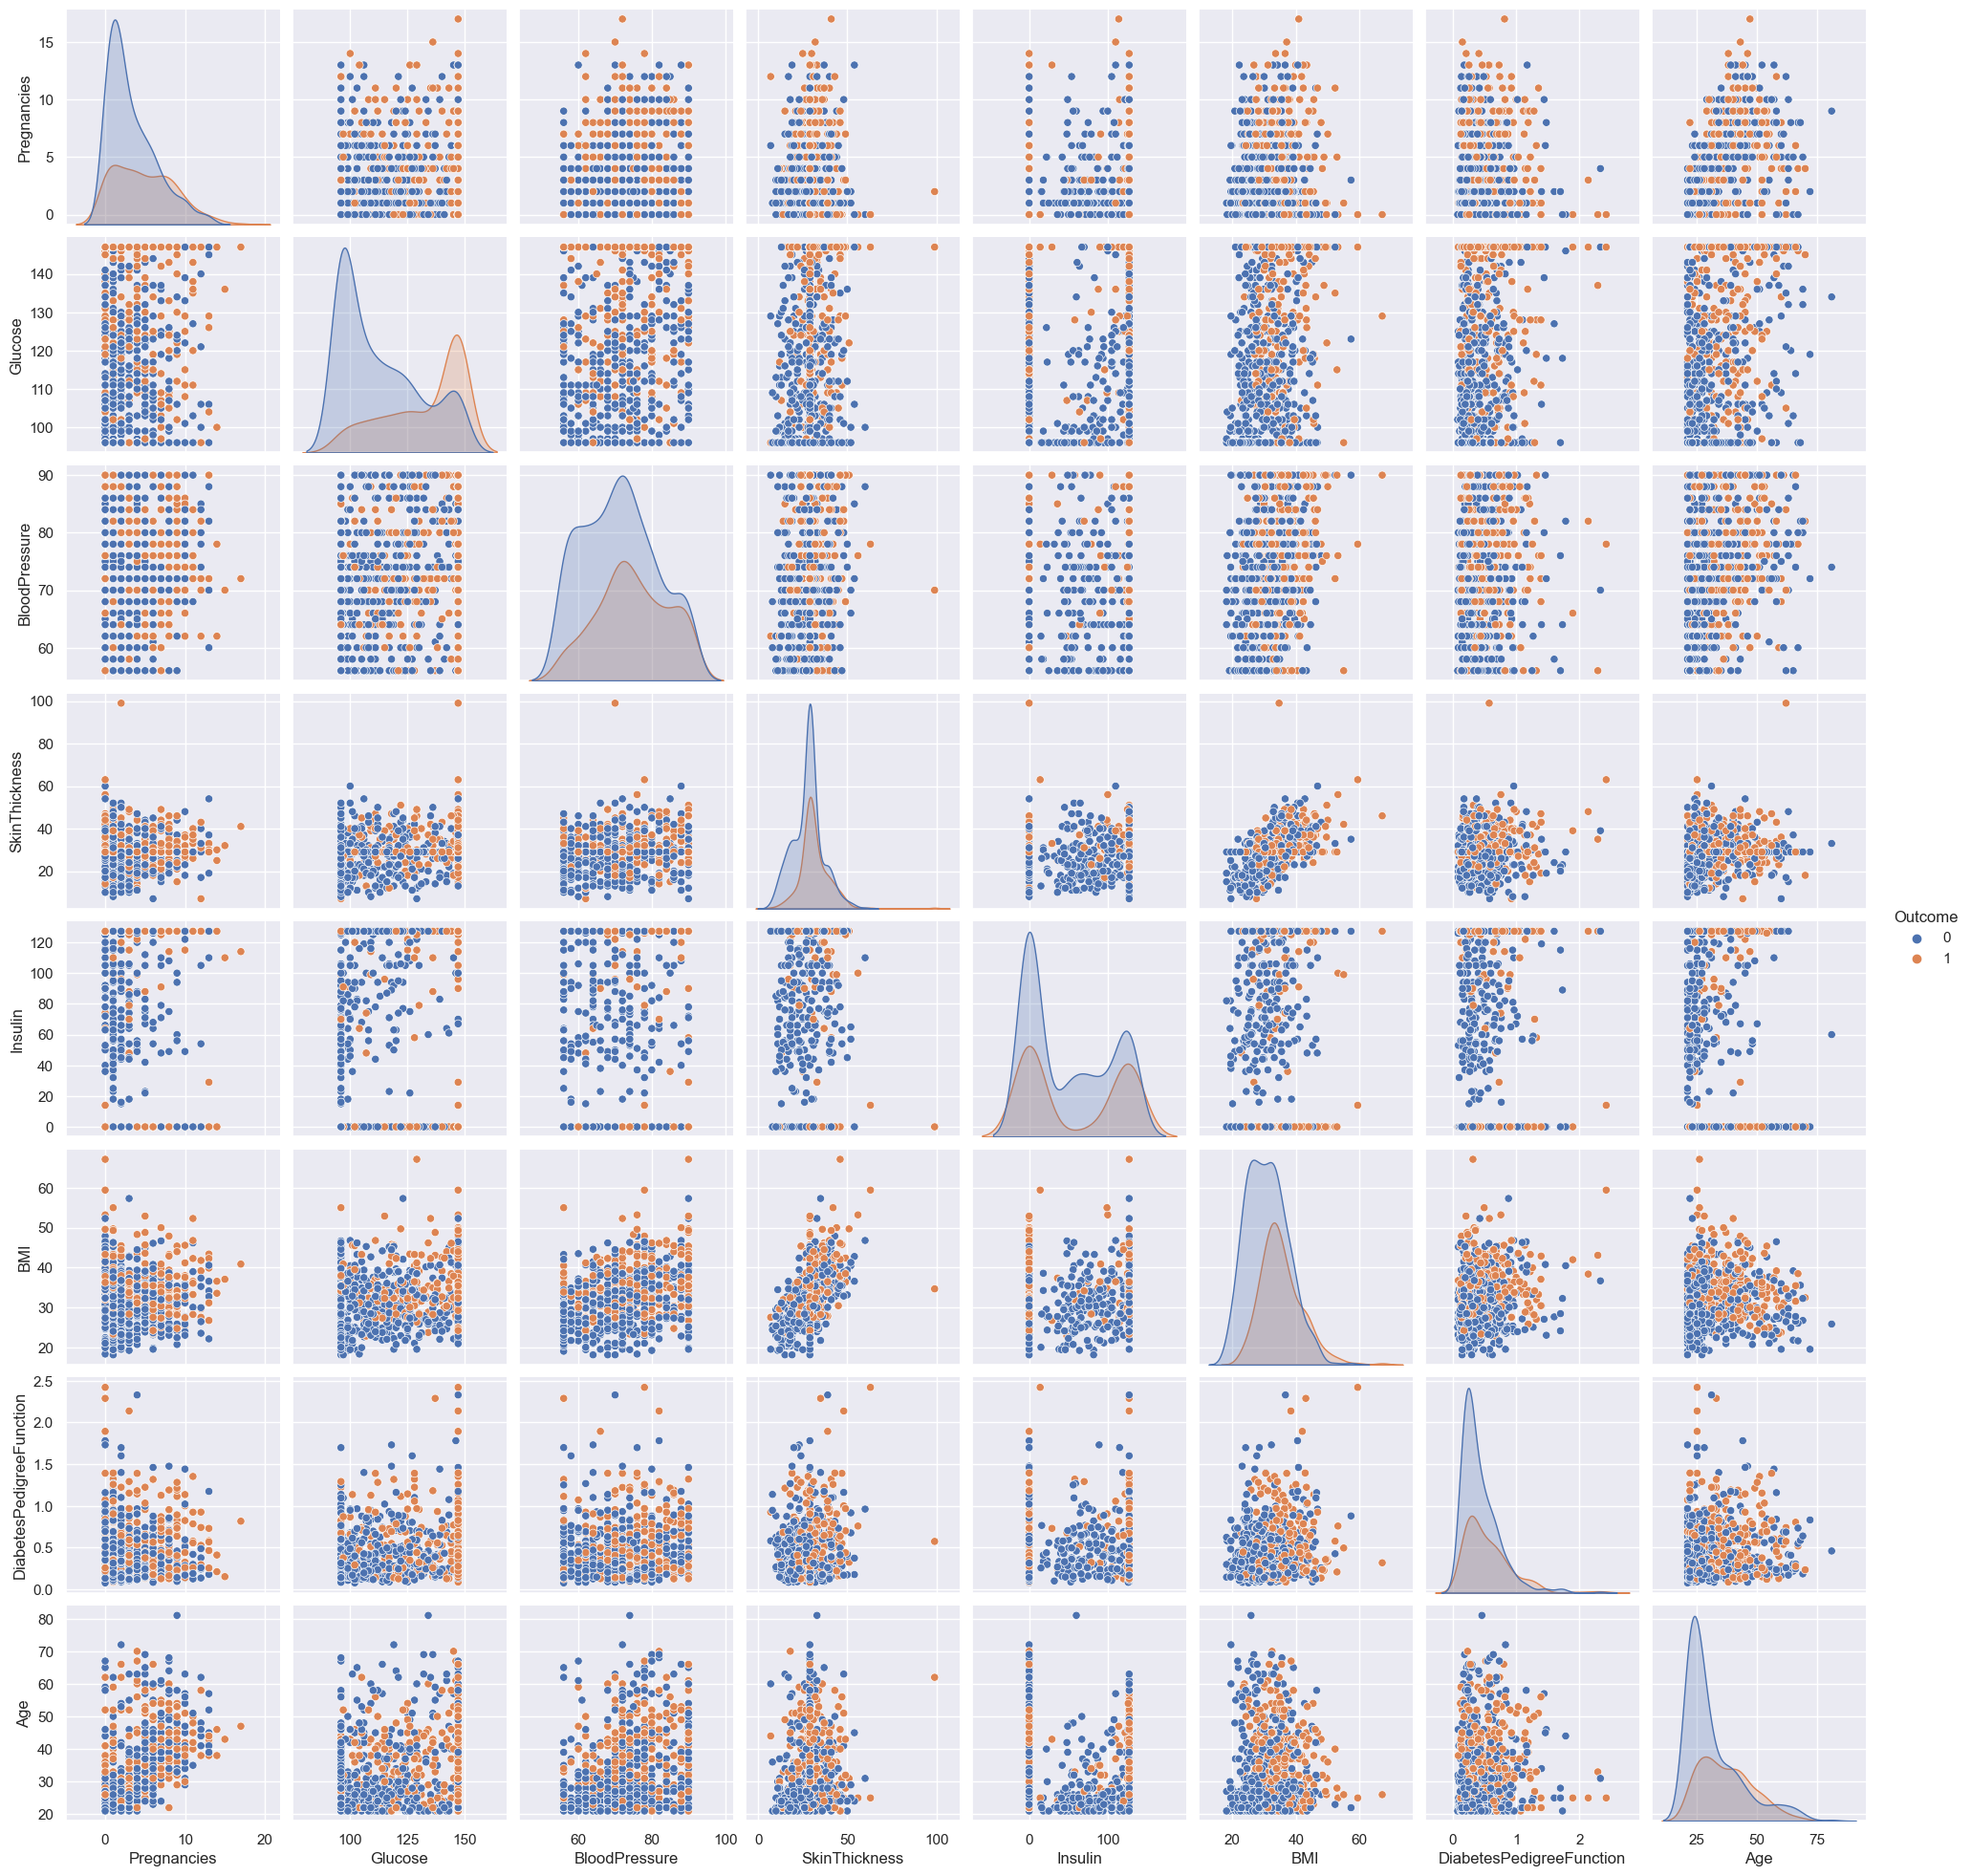

In [72]:
#Creando graficas de dispercion 
sb.pairplot(df,hue="Outcome",diag_kind="kde")